<a href="https://colab.research.google.com/github/amirularsyad/MachineLearningCourse_HW_TelU/blob/main/2ndWeek/Public_Data_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Muhammad Amirul Arsyad Arrayyan
# 1103204207
# Tugas Week2
# Menghubungkan ke drive
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Path sesuai lokasi dataset CSV di Google Drive
file_path = '/content/drive/MyDrive/Dataset/anime.csv'

# Membaca Dataset
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dataset
print(df.head())

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  


In [3]:
# dataframe menampilkan 5 baris awal dan 5 baris akhir data
# dataframe juga menampilkan jumlah total data yang ada
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [4]:
# Informasi isi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

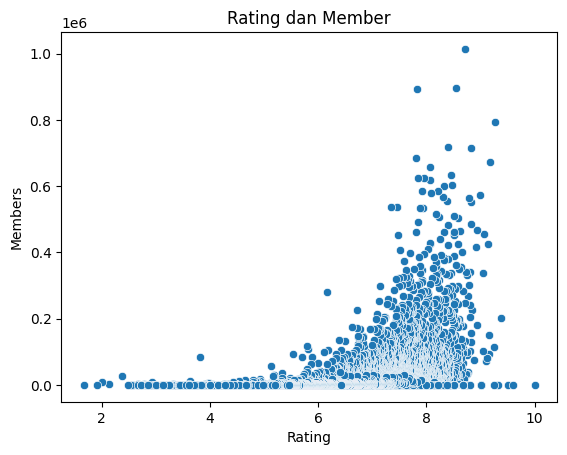

In [35]:
# Membuat Scatterplot
sns.scatterplot(data=df, x="rating", y="members")

# Memberikan judul dan label sumbu
plt.title("Rating dan Member")
plt.xlabel("Rating")
plt.ylabel("Members")
plt.show()

In [25]:
x = df["rating"]

y = df["members"]

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

NameError: ignored

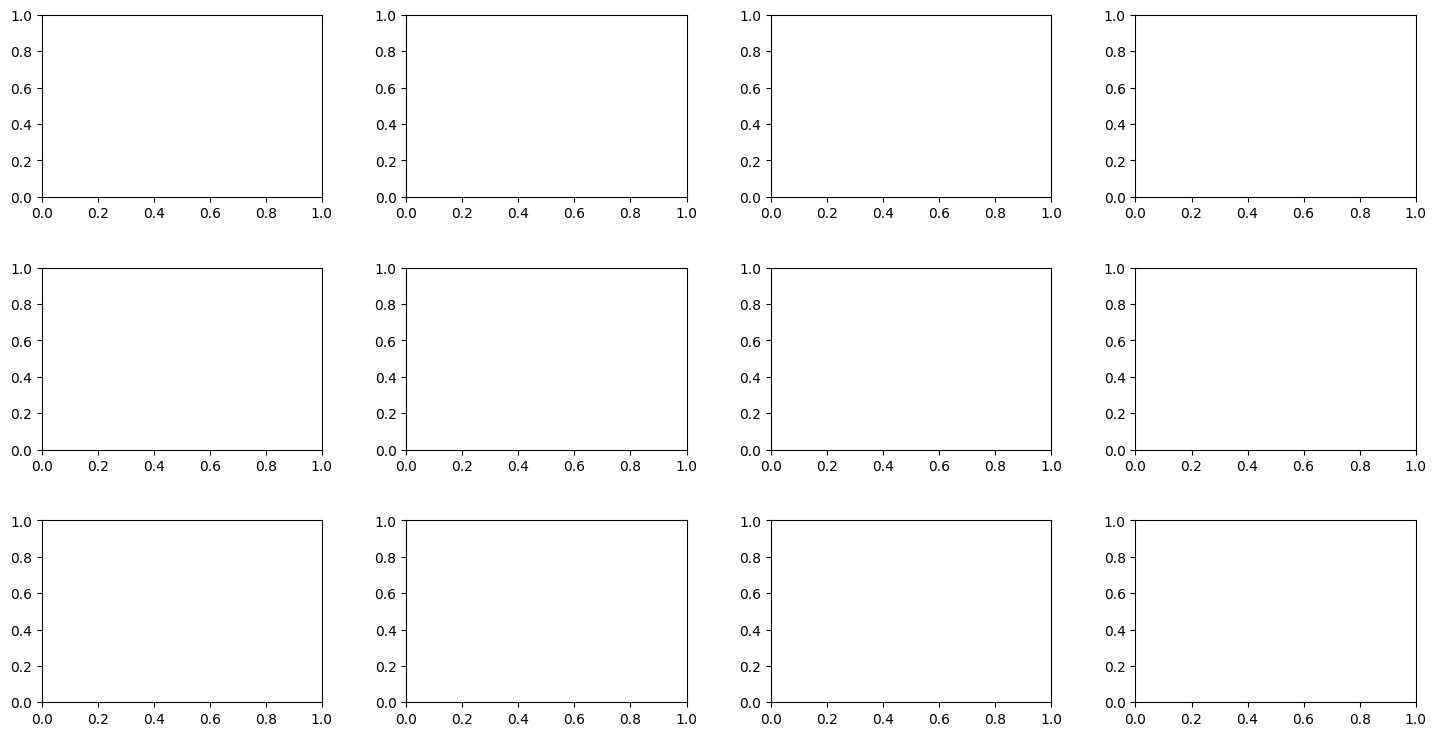

In [40]:
# Derajat yang ingin diuji
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
mse_values = []

# Membuat subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 8))
fig.tight_layout(pad=3.0)

for i, degree in enumerate(degrees):
    # Mengubah fitur X menjadi matriks polinomial dengan derajat tertentu
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Membuat model regresi linear dengan fitur polinomial
    model = LinearRegression()
    model.fit(X_poly, y)

    # Membuat prediksi
    y_pred = model.predict(X_poly)

    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

    # Menampilkan plot data asli dan kurva regresi
    ax = axes[i // 4, i % 4]
    ax.scatter(X, y, label='Data Asli')
    ax.plot(X, y_pred, color='red', label='Kurva Regresi (Degree {})'.format(degree))
    ax.set_title('Regresi Polynomial: Degree {}'.format(degree))
    ax.set_title(f'Degree {degree}\nMSE: {mse:.2f}')
    ax.set_xlabel('distance')
    ax.set_ylabel('delTime')
    ax.legend()

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()

for degree, mse in zip(degrees, mse_values):
    print(f'Degree {degree}: MSE = {mse:.2f}')